In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
def csv_from_prediction(prediction, filename='submission.csv'):
    submission = pd.DataFrame(data={'ImageId': np.arange(1,len(prediction)+1), 'Label': prediction.astype(int)})

    # This is what we do if we don't use 'index=False' below
    #submission.set_index('PassengerId', drop=True, inplace=True)
    submission.to_csv(filename, index=False)

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
y_train = to_categorical(train['label'])
X_train = (train.drop('label', axis=1)/255).as_matrix()

In [5]:
# We were not normalizing before, duh! Now I get -> 0.91271
X_test = (test/255).as_matrix()

In [6]:
# First attempt hand a single hidden layer with 100 neurons. -> 0.85514
# This is a quick test with 2 hidden layers and 200 neurons each. -> 0.85786
# Increasing the epoch and addition a validation split -> 0.86986
# Now every layer will have 1000 neurons??? or better NOT
model = Sequential()

model.add(Dense(output_dim=200, input_dim=X_train.shape[1]))
model.add(Dense(output_dim=200))
model.add(Dense(output_dim=200))
model.add(Dense(output_dim=y_train.shape[1], input_dim=X_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['binary_accuracy', 'fmeasure', 'precision', 'recall'])

In [7]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 200)           157000      dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 200)           40200       dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 200)           40200       dense_2[0][0]                    
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 10)            2010        dense_3[0][0]                    
Total params: 239,410
Trainable params: 239,410
Non-trainable params: 0
___________________

In [8]:
training_history = model.fit(X_train, y_train, validation_split=.2, nb_epoch=22)

Train on 33600 samples, validate on 8400 samples
Epoch 1/22
33600/33600 [==============================] - 6s - loss: 0.4321 - binary_accuracy: 0.9757 - fmeasure: 0.8720 - precision: 0.8990 - recall: 0.8509 - val_loss: 0.3289 - val_binary_accuracy: 0.9817 - val_fmeasure: 0.9063 - val_precision: 0.9258 - val_recall: 0.8882

In [9]:
prediction = model.predict_classes(X_test)

27808/28000 [============================>.] - ETA: 0s 

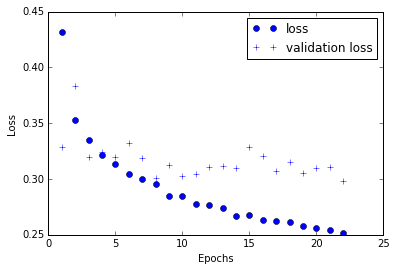

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = training_history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo', label='loss')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

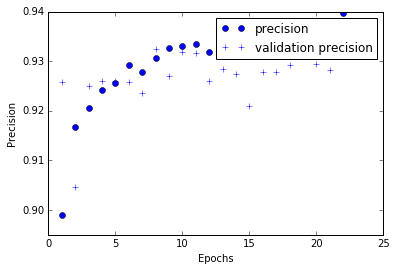

In [11]:
plt.clf()   # clear figure
pre_values = history_dict['precision']
val_pre_values = history_dict['val_precision']

plt.plot(epochs, pre_values, 'bo', label='precision')
plt.plot(epochs, val_pre_values, 'b+', label='validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [14]:
#csv_from_prediction(prediction, filename='submission_20170314_xxx.csv')